In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

In [56]:
time_pattern = re.compile('sample_solutions_(\d+)')
order_pattern = re.compile('solution_(\d+)_(\w+)')
df_list = []

In [57]:
for sln_root in ['sample_solutions_10', 'sample_solutions_300']:
    for sln_dir in sorted(os.listdir(sln_root)):
        summary_pth = os.path.join(sln_root, sln_dir, 'summary.csv')
        df = pd.read_csv(summary_pth)
        df = df.loc[df['key'] == 'cost']
        df['orders'] = int(order_pattern.match(sln_dir).group(1))
        df['solve'] = order_pattern.match(sln_dir).group(2)
        df['time'] = time_pattern.match(sln_root).group(1)
        df = df[['orders', 'solve', 'time', 'value']]
        df.columns = ['orders', 'solve', 'time', 'best_solution']
        df_list.append(df)

In [58]:
df = pd.concat(df_list)
df.sort_values(by=['orders'], inplace=True)
gb = dict(tuple(df.groupby(['solve', 'time'])["orders", "best_solution"]))
gb

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_65369/2036056011.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb = dict(tuple(df.groupby(['solve', 'time'])["orders", "best_solution"]))


{('exact',
  '10'):    orders  best_solution
 0       5    1416.164113
 0      10    2086.899715
 0      15    3556.285216
 0      20    4592.958425
 0      25    5732.150790
 0      30    6761.242374
 0      35    7734.221057
 0      40    9124.982287
 0      45   10562.557566,
 ('exact',
  '300'):    orders  best_solution
 0       5    1416.164113
 0      10    2086.899715
 0      15    3541.860803
 0      20    4579.300835
 0      25    5128.126246
 0      30    6595.672010
 0      35    7210.355923
 0      40    8411.878584
 0      45    9547.547785
 0      50   10975.881178,
 ('heuristic',
  '10'):    orders  best_solution
 0       5    1416.164113
 0      10    3668.334578
 0      15    3888.360144
 0      20    4695.748433
 0      25    6058.926246
 0      30    7805.967916
 0      35    9854.080089
 0      40   10802.815759
 0      45   14021.186743
 0      50   16596.439615}

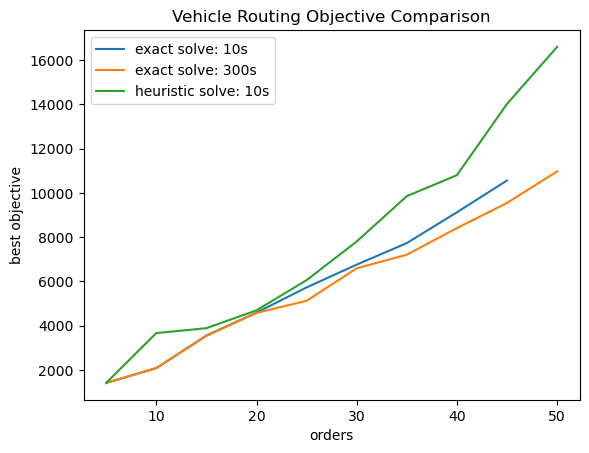

In [61]:
for (solve, time), gdb in gb.items():
    plt.plot(gdb['orders'], gdb['best_solution'], label=f'{solve} solve: {time}s')

plt.xlabel("orders")
plt.ylabel("best objective")
plt.title('Vehicle Routing Objective Comparison')
plt.legend(loc="upper left")